In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# convert csv to pandas dataframe and print it in a table

# read csv file
df = pd.read_csv('data_2.csv')

# convert to numpy array
df = df.to_numpy()

# convert to pandas dataframe
df = pd.DataFrame(df)

# rename columns time,.header.seq,.header.stamp.secs,.header.stamp.nsecs,.header.frame_id,.pose.position.x,.pose.position.y,.pose.position.z,.pose.orientation.x,.pose.orientation.y,.pose.orientation.z,.pose.orientation.w

df.columns = ['time', 'header.seq', 'header.stamp.secs', 'header.stamp.nsecs', 'header.frame_id', 'pose.position.x', 'pose.position.y', 'pose.position.z', 'pose.orientation.x', 'pose.orientation.y', 'pose.orientation.z', 'pose.orientation.w']


# df_new with only columns time,pose.position.x,pose.position.y,pose.position.z in reverse order and in colum time take  only after :
df_new = df[['time', 'pose.position.x', 'pose.position.y', 'pose.position.z']]
df_new['time'] = df_new['time'].str[17:]

# subtract the first value of time from all values of time
df_new['time'] = df_new['time'].astype(float)
df_new['time'] = df_new['time'] - df_new['time'][0]

/tmp/ipykernel_6486/268240857.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['time'] = df_new['time'].str[17:]
/tmp/ipykernel_6486/268240857.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['time'] = df_new['time'].astype(float)
/tmp/ipykernel_6486/268240857.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [5]:
df_new
# %matplotlib inline

,time,pose.position.x,pose.position.y,pose.position.z
0,0.000000,-0.926428,-1.109085,0.528701
1,0.000040,-0.470109,-0.840116,0.221063
2,0.000448,-0.462837,-0.833741,0.270618
3,0.000452,-0.3419,-0.730808,0.720408
4,0.009708,-0.330456,-0.721485,0.763209
...,...,...,...,...
146,1.249809,1.543032,0.609374,0.518548
147,1.249823,1.563967,0.62226,0.530054
148,1.259765,1.585864,0.635272,0.537265
149,1.270007,1.606115,0.647818,0.541297


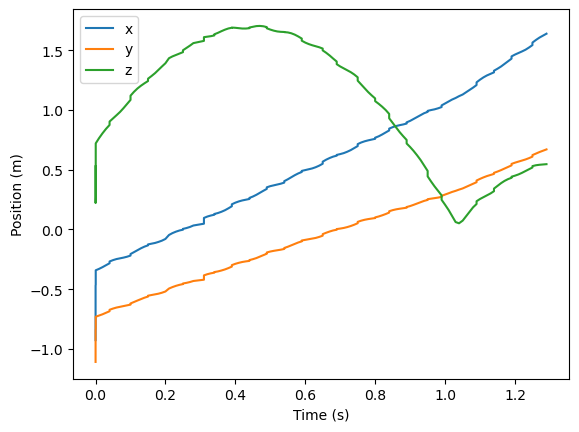

In [6]:
# convert df_new to a numpy array
df_new_numpy_array = df_new.to_numpy()

# df_new_numpy_array[][0] = time, df_new_numpy_array[][1] = x, df_new_numpy_array[][2] = y, df_new_numpy_array[][3] = z plot them

# plot the x, y, z coordinates
plt.plot(df_new_numpy_array[:,0], df_new_numpy_array[:,1], label='x')
plt.plot(df_new_numpy_array[:,0], df_new_numpy_array[:,2], label='y')
plt.plot(df_new_numpy_array[:,0], df_new_numpy_array[:,3], label='z')

# add labels and legend
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()

# show the plot
plt.show()

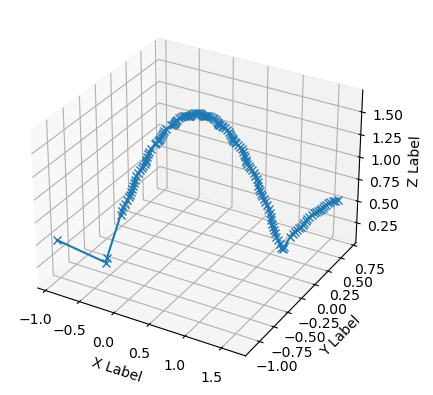

In [7]:
# plot using matplotlib.animation and mpl_toolkits.mplot3d and matplotlib.pyplot from df_new_numpy_array

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(df_new_numpy_array[:,1], df_new_numpy_array[:,2], df_new_numpy_array[:,3], marker='x')
# ax.scatter(df_new_numpy_array[:,1], df_new_numpy_array[:,2], df_new_numpy_array[:,3], c='r')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

### Remove unwanted part of the trajectory

In [8]:
# in df_new_numpy_array remove first three rows and store in df_new1_numpy_array

final_data = df_new_numpy_array[3: 123]
np.shape(final_data)

(120, 4)

Text(0.5, 0, 'Z Label')

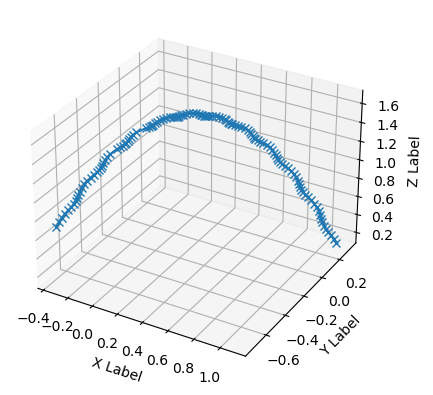

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(final_data[:,1], final_data[:,2], final_data[:,3], marker='x')
# ax.scatter(df_new_numpy_array[:,1], df_new_numpy_array[:,2], df_new_numpy_array[:,3], c='r')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

### Approximation
> 120 data points , assume 1s, delta_t = 1 / 120

#### Constants

In [ ]:
kd = 5.36            # Approx drag

g = np.array([0, 0, -9.81])   #SI

delta_t = 1 / 120

### Formulae

In [ ]:
def norm(v):
    return np.sqrt(v[0] ** 2 + v[1] ** 2 + v[2] ** 2)

def acc_step_k(kd, g, vel_step_k):
    return g - kd * norm(vel_step_k) * vel_step_k

def vel_step_k_plus_1(vel_step_k, acc_step_k, dt):
    return vel_step_k + acc_step_k * dt

def pos_step_k_plus_1(pos_step_k, vel_step_k_plus_1, dt):
    return pos_step_k + vel_step_k_plus_1 * dt + 0.5 * acc_step_k * dt ** 2